In [1]:
# 트랜스포머 설치
! pip install transformers datasets
# 최신버전 설치는 아래 커맨드 참고
# ! pip install git+https://github.com/huggingface/transformers.git


     |████████████████████████████████| 3.1 MB 4.1 MB/s 
     |████████████████████████████████| 290 kB 52.1 MB/s 
     |████████████████████████████████| 895 kB 44.5 MB/s 
     |████████████████████████████████| 59 kB 7.4 MB/s 
     |████████████████████████████████| 596 kB 45.8 MB/s 
     |████████████████████████████████| 3.3 MB 35.4 MB/s 
     |████████████████████████████████| 243 kB 43.8 MB/s 
     |████████████████████████████████| 132 kB 53.2 MB/s 
     |████████████████████████████████| 1.1 MB 29.9 MB/s 
     |████████████████████████████████| 160 kB 50.3 MB/s 
     |████████████████████████████████| 271 kB 48.1 MB/s 
     |████████████████████████████████| 192 kB 52.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# 수행과업 요약

> 트랜스포머를 활용해서 할 수 있는 많은 과업 중에서 가장 흔히 쓰이는 것들을 모아놓은 것으로서 다양한 용도로 활용 가능함. 대표적인 예로는 질문-답변, 문자열 분류, 개체명 인식 등이 있음.

> 여기에 제시된 사례들은 자동으로 구동되는 모델들로서 모델 구조를 알맞게 선택하면 됨. 과업에 맞게 모델이 좋은 성과를 내기 위해서는 해당 과업에 맞는 체크포인트로부터 로딩되어야 하며 이 체크포인트는 흔히 커다란 말뭉치에 대해서 사전 학습된 상태로 특정 과업에 맞게 미세 조정되게 됨. 

> 이는 

- 모든 모델이 모든 과업에 대해서 미세조정되는 것은 아니라는 뜻임. 만약 어떤 모델을 특정한 과업에 맞게 미세조정하길 원한다면 예시 디렉토리에 있는 스크립트 중의 하나를 활용할 수 있음(https://github.com/huggingface/transformers/tree/master/examples) 

- 미세 조정된 모델은 특정한 데이터셋에 대해서 미세조정됨. 이 데이터셋은 사용 사례 및 특정 분야와 겹칠 수도 있고 그렇지 않을 수도 있음. 언급된 바와 같이 미세 조정을 하기 위해서는 아래 스크립트를 활용하거나 스스로 스크립트를 만들 수 있음(https://github.com/huggingface/transformers/tree/master/examples). 

> 과업에 대해서 추론 작업을 하려면, 라이브러리를 통해 몇 가지 메커니즘을 활용할 수 있음.  

- Pipelines: 추상화를 사용한 매우 간단한 방법으로서 두어 줄의 코드를 써서 사용할 수 있음
- Direct model use: 추상화의 정도는 덜하지만, 토크나이저에 직접 접근하기 때문에 유연성과 
  연산능력은 더 좋음. 



## Sequence Classification(문자열 분류)

> 문자열 분류는 주어진 범주의 개수에 따라 문자열을 분류하는 작업으로 **GLUE(General Language Understanding Evaluation) 데이터셋**이 그 예라고 할 수 있음. 파이프라인을 사용해서 감정 분석을 한 사례가 아래에 있으며, 각각의 문장이 긍정의 의미인지 부정의 의미인지를 판별함.(아래와 같이 긍정/부정의 라벨을 점수와 함께 출력해냄) (GLUE 데이터셋에 대한 더 자세한 설명은 https://huffon.github.io/2019/11/16/glue/를 참고!)


|파이프라인|alias|설명|
|:------:|:---:|:---:|
|"audio-classification"|-|파동형태나 오디오 파일의 범주를 예측함|
|"automatic-speech-recognition"|-|음성파일에서 발화 텍스트를 추출해냄|
|"conversational"|-|대화하는 데에 사용될 수 있음|
|"feature-extraction"||숨겨진 특질을 추출해낼 수 있음 |
|**"fill-mask"**|-|**mask-filling에 활용될 수 있음**|
|"image-classification"|-|이미지의 범주 구별|
|**"question-answering"**|-|**질문과 답변 모델로 사용할 수 있음**|
|"text2text-generation"|-|텍스트로부터 텍스트를 생성함|
|**"text-classification"**|**"sentiment-analysis"**|**감정 범주 분류에 활용**|
|"text-generation"|-|텍스트 생성에 활용|
|"token-classification"|"ner"|토큰 분류에 활용|
|"translation"|-|언어 번역에 활용|
|"translation_xx_to_yy"|-|한 언어를 다른 언어에 번역할 때 활용|
|"summarization"|-|뉴스기사나 다른 문서를 요약할 수 있음|
|"zero-shot-classification"|-|zero-shot분류에 활용|

In [2]:
렐from transformers import pipeline
classifier = pipeline("sentiment-analysis")
result = classifier("I hate you")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
result = classifier("I love you")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

label: NEGATIVE, with score: 0.9991
label: POSITIVE, with score: 0.9999


>**아래는 두 문장이 서로 패러프레이징이 된 문장인지를 판별하는 문자열 분류의 한 가지 사례로서 과정은 다음과 같음.** 

1. 토크나이저를 작동하고 체크 포인트 이름으로 모델을 시작함. 모델은 **BERT**모델이며 체크포인트 내에    저장되어 있는 가중치로 함께 이를 업로드함
2. 두 문장에서부터 모델에 한정된 구분자, 토큰 종류, (토크나이저에 의해서 자동으로 생성될) 어텐션   마스크를 가지고 문자열을 만듦
3. 해당 문자열을 모델에 집어넣어서 두 개의 범주 (0: 패러프레이징을 안 했음, 1: 패러프레이징을 했음) 
중의 하나로 분류되도록 함
4. 범주들에 대한 확률값을 얻기 위해서 결과의 소프트맥스값을 구함
5. 결과를 출력함

In [3]:
# 모듈 불러오기 
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# 토크나이저와 모델 지정
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")


# 범주 설정
classes = ["not paraphrase", "is paraphrase"]

# 문자열 설정
sequence_0 = "The company HuggingFace is based in New York City" # 문자열_0: "회사 허깅페이스는 뉴욕 도시에 위치해 있다.""

sequence_1 = "Apples are especially bad for your health" # 문자열_1 "사과는 특히 당신의 건강에 좋지 않다."

sequence_2 = "HuggingFace's headquarters are situated in Manhattan" # 문자열_2"허깅페이스 사의 본부는 맨하탄에 위치해있다."



# 토크나이저는 자동으로 어텐션 마스크를 계산할 뿐만 아니라 구분자 중의 하나( <CLS>와 <SEP>와 토큰을 문자열에 넣음 

paraphrase = tokenizer(sequence_0, sequence_2, return_tensors="pt") # 문자열_0과 문자열_2간의 패러프레이징 확률을 계산 

not_paraphrase = tokenizer(sequence_0, sequence_1, return_tensors="pt") # 문자열_0과 문자열_1간의 패러프레이징 확률을 계산 



paraphrase_classification_logits = model(**paraphrase).logits # 문자열_0과 문자열_2간의 패러프레이징 확률을 로짓 함수값으로 계산 

not_paraphrase_classification_logits = model(**not_paraphrase).logits # 문자열_0과 문자열_1간의 패러프레이징 확률을 로짓 함수값으로 계산 



paraphrase_results = torch.softmax(paraphrase_classification_logits, dim=1).tolist()[0] # 문자열_0과 문자열_2간의 패러프레이징 확률 결과값 도출

not_paraphrase_results = torch.softmax(not_paraphrase_classification_logits, dim=1).tolist()[0] # 문자열_0과 문자열_1간의 패러프레이징 확률 결과값 도출

# 패러프레이즈가 맞는 경우
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(paraphrase_results[i] * 100))}%")

# 패러프레이즈가 아닌 경우 
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(not_paraphrase_results[i] * 100))}%")


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/413M [00:00<?, ?B/s]

not paraphrase: 10%
is paraphrase: 90%
not paraphrase: 94%
is paraphrase: 6%


## Extractive Question Answering(질의 응답)

> 질의 응답은 질문이 주어졌을 때 텍스트로부터 답변을 추출하는 과업으로서 질의 응답 데이터셋의 예시로는
SQuAD dataset이 있으며 이는 전적으로 이 과업을 목적으로 한 데이터셋임. 이 데이터셋을 미세 조정하고자 하는 경우에는 [run_qa.py](https://github.com/huggingface/transformers/tree/master/examples/pytorch/question-answering/run_qa.py) and
[run_tf_squad.py](https://github.com/huggingface/transformers/tree/master/examples/tensorflow/question-answering/run_tf_squad.py) 스크립트를 활용할 필요가 있음.

>아래의 사례는 질의 응답을 하기 위해서 파이프라인을 사용한 사례로서 주어진 텍스트에서 질문에 대한 답변을 추출해내는 것이며, SQuAD 데이터셋에 대해 미세 조정된 모델을 활용하였음. 

In [4]:
from transformers import pipeline

# 질의응답에 대한 파이프라인 구축
question_answerer = pipeline("question-answering")

# 텍스트 제시 
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the examples/pytorch/question-answering/run_squad.py script.
"""

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

> 아래에서는 텍스트로부터 "시작"과 "끝" 값을 따라 답과 신뢰성 점수를 도출해내는데 이는 텍스트에 있는 답의 위치를 뜻함. 

In [5]:
result = question_answerer(question="What is extractive question answering?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
result = question_answerer(question="What is a good example of a question answering dataset?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'the task of extracting an answer from a text given a question', score: 0.6177, start: 34, end: 95
Answer: 'SQuAD dataset', score: 0.5152, start: 147, end: 160


> 모델과 토크나이저를 활용한 질의응답의 사례가 아래에 있음. 그 과정은 다음과 같음. 
1. 체크포인트로부터 모델과 토크나이저를 시작함. 모델은 버트코델이며 체크포인트에 저장된 가중치와 함께 올려짐 
2. 텍스트와 몇 가지 질문을 설정함
3. 질문들을 순회하면서 텍스트와 현재의 질문에 대한 문자열을 쌓으며, 이 때 해당 모델에 특정화된 구분자 토큰 타입과 어텐션 마스크도 같이 준비함   
4. 이렇게 생성된 문자열을 모델에 넣고 이로부터 질문과 텍스트 각각의 시작과 끝자리에 대해 전체 시퀀스 토큰에 걸친 점수값의 범위를 얻어냄 
5. 토큰들의 결과값을 소프트맥스 함수로 계산해서 확률값을 얻어냄. 
6. 토큰값을 불러와서 이를 문자 형태로 변환 
7. 결과값 출력

In [6]:
# 모듈 불러오기 
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

# 모델과 토크나이저 설정하기
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

# 텍스트 설정하기 
text = r"""
🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
TensorFlow 2.0 and PyTorch.
"""
# 질문 제시하기 
questions = [
    "How many pretrained models are available in 🤗 Transformers?",
    "What does 🤗 Transformers provide?",
    "🤗 Transformers provides interoperability between which frameworks?",
]
for question in questions:
    inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

    answer_start = torch.argmax(
        answer_start_scores
    )  # 최고 점수값으로서 가장 대답의 시작이 될 부분을 얻음  
    answer_end = torch.argmax(answer_end_scores) + 1  # 최고 점수값으로서 가장 대답의 끝이 될 부분을 얻음  

    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    # 질문과 답을 출력하기 
    print(f"Question: {question}")
    print(f"Answer: {answer}")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Question: How many pretrained models are available in 🤗 Transformers?
Answer: over 32 +
Question: What does 🤗 Transformers provide?
Answer: general - purpose architectures
Question: 🤗 Transformers provides interoperability between which frameworks?
Answer: tensorflow 2. 0 and pytorch


## Language Modeling(언어 모델링) 

> 언어 모델링은 모델을 말뭉치에 알맞게 바꾸는 작업으로서 특정 분야에 한정시키는 방식으로 진행될 수 있음.. 현재 인기를 얻고 있는 트랜스포머 계열의 모델은 다양한 언어 모델링의 종류를 활용함. (예를 들어서 BERT는 masked language modeling을 사용했으며, GPT-2는 causal language modeling을 사용했음.) 

> 언어 모델링은 사전 훈련된 범위 밖에서도 유용하게 사용될 수 있는데 이는 모델의 분포를 특정 분야에 맞게 바꾸는 예를 들 수 있음: 매우 커다란 말뭉치로 훈련된 언어 모델을 뉴스 데이터셋이나 과학 논문 등에 맞게 미세조정할 수 있음 (e.g. [LysandreJik/arxiv-nlp](https://huggingface.co/lysandre/arxiv-nlp)).



### Masked Language Modeling(마스킹 언어모델)

> 마스킹 언어 모델은 순서열의 토큰을 마스킹 토큰으로 마스킹을 하고 해당 모델이 마스킹이 된 부분을 알맞은 토큰으로 채워넣게 하는 과업임. 이를 위해서 모델은 해당 토큰의 왼쪽 부분과 오른쪽 부분 모두를 다룰 필요가 있음. 그러한 훈련 과정이 양방향의 문맥(예를 들면, SQuAD와 같이 질의 응답용 데이터셋)을 요하는 다운스트림 과업의 기반이 됨. (자세한 내용은 (https://arxiv.org/abs/1910.13461) 4.2장 참조)

> 마스킹 언어 모델에 대한 모델을 미세조정하고 싶다면, :prefix_link:*run_mlm.py <examples/pytorch/language-modeling/run_mlm.py>* 스크립트를 활용할 수 있음. 


> 아래는 파이프라인을 활용해서 순서열에서 매스킹을 바꾸는 사례임.

In [7]:
from transformers import pipeline
unmasker = pipeline("fill-mask")

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

> 이 출력값은 마스크가 된 문자열과 신뢰성 점수 및 토크나이저 어휘에 있는 토큰 아이디를 출력해냄.

In [8]:
from pprint import pprint
pprint(unmasker(f"HuggingFace is creating a {unmasker.tokenizer.mask_token} that the community uses to solve NLP tasks."))

[{'score': 0.17927499115467072,
  'sequence': 'HuggingFace is creating a tool that the community uses to solve '
              'NLP tasks.',
  'token': 3944,
  'token_str': ' tool'},
 {'score': 0.11349404603242874,
  'sequence': 'HuggingFace is creating a framework that the community uses to '
              'solve NLP tasks.',
  'token': 7208,
  'token_str': ' framework'},
 {'score': 0.05243541672825813,
  'sequence': 'HuggingFace is creating a library that the community uses to '
              'solve NLP tasks.',
  'token': 5560,
  'token_str': ' library'},
 {'score': 0.034935448318719864,
  'sequence': 'HuggingFace is creating a database that the community uses to '
              'solve NLP tasks.',
  'token': 8503,
  'token_str': ' database'},
 {'score': 0.028602484613656998,
  'sequence': 'HuggingFace is creating a prototype that the community uses to '
              'solve NLP tasks.',
  'token': 17715,
  'token_str': ' prototype'}]


> 아래는 모델과 토크나이저를 활용해서 마스킹 언어 모델링을 하는 사례로서 과정은 다음과 같음.

1. 체크포인트로부터 토크나이저와 모델을 가동하는데 이 때 모델은 DistilBERT이며 이를 체크포인트에 저장된 가중치값과 함께 올림
2. 마스킹된 토큰과 함께 시퀀스를 정의하며, 단어 대신에 `tokenizer.mask_token`를 배치시킴
3. ID의 리스트에 시퀀스를 인코딩하며, 해당 리스트에서 마스킹된 토큰의 위치를 찾아냄
4. 마스킹 토큰의 인덱스에서 예측값을 구할 때, 이 텐서값은 그 단어와 동일한 크기여야 함. 또한 그 값은 각각의 토큰에 속하는 점수로서 그 문맥에서 보다 그럴 듯한 토큰에 모델이 점수를 부여함
5. 파이토치의 `topk`나 텐서플로우의 `top_k` 메서드를 활용하여 상위 5개의 토큰을 얻어냄.
6. 그 (5개의 토큰들로) 마스킹 토큰을 대체하고 결과를 출력함

In [9]:
from transformers import AutoModelWithLMHead, AutoTokenizer
import torch
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
model = AutoModelWithLMHead.from_pretrained("distilbert-base-cased")
sequence = f"Distilled models are smaller than the models they mimic. Using them instead of the large versions would help {tokenizer.mask_token} our carbon footprint."
input = tokenizer.encode(sequence, return_tensors="pt")
mask_token_index = torch.where(input == tokenizer.mask_token_id)[1]
token_logits = model(input).logits
mask_token_logits = token_logits[0, mask_token_index, :]
top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:698: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/251M [00:00<?, ?B/s]

> 이는 결과값으로 모델에 의해서 예측된 5개 토큰과 함께 다섯 개의 문자열을 출력함.

In [10]:
for token in top_5_tokens:
    print(sequence.replace(tokenizer.mask_token, tokenizer.decode([token])))

Distilled models are smaller than the models they mimic. Using them instead of the large versions would help reduce our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help increase our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help decrease our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help offset our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help improve our carbon footprint.


### Causal Language Modeling (인과관계 언어모델)

> 인과관계 언어모델은 특정 토큰 뒤에 이어지는 토큰들을 예측하는 과업임. 이 때, 모델은 오로지 (매스킹된 토큰의 왼쪽 토큰인) 문맥의 왼쪽 만을 다루게 됨. 이러한 훈련과정은 생성 과업에 있어서는 상당히 흥미로운 일이며 인과관계 언어모델에 대해서 미세조정을 하고 싶다면, :prefix_link:*run_clm.py <examples/pytorch/language-modeling/run_clm.py>* 을 활용할 수 있음.

> 흔히, 바로 뒤에 나오는 토큰은 입력 시퀀스에서 모델이 생성한 마지막 은닉 상태의 로짓값으로부터 샘플링이 되어 예측됨. 

> 모델과 토크나이저를 활용하고 토큰의 입력 시퀀스를 잇는 그 다음 토큰을 샘플링하는 방법으로 `PreTrainedModel.top_k_top_p_filtering`을 활용하는 사례가 아래에 나와 있음.

In [11]:
from transformers import AutoModelWithLMHead, AutoTokenizer, top_k_top_p_filtering
import torch
from torch import nn

# 토크나이저와 모델 설정하기
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelWithLMHead.from_pretrained("gpt2")

# 시퀀스 제시하기 
sequence = f"Hugging Face is based in DUMBO, New York City, and"

# 입력값 인코딩하기 
input_ids = tokenizer.encode(sequence, return_tensors="pt")

# 마지막 은닉상태로부터 로짓값 얻기
next_token_logits = model(input_ids).logits[:, -1, :]

# 필터링하기
filtered_next_token_logits = top_k_top_p_filtering(next_token_logits, top_k=50, top_p=1.0)

# 샘플링하기 
probs = nn.functional.softmax(filtered_next_token_logits, dim=-1)

# 다음 토큰 구하기 
next_token = torch.multinomial(probs, num_samples=1)
generated = torch.cat([input_ids, next_token], dim=-1)

# 결과값 구하기 
resulting_string = tokenizer.decode(generated.tolist()[0])

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:698: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

> 여기서는 기존 시퀀스를 잇는 다음 코튼을 나오며, 이 사례에서는 'and' 뒤의 토큰을 의미함.

In [12]:
print(resulting_string)

Hugging Face is based in DUMBO, New York City, and is


#Project

##**1. 시퀀스 분류(https://huggingface.co/transformers/v2.10.0/usage.html)**

In [13]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")

classes = ["not paraphrase", "is paraphrase"]

sequence_0 = "The company HuggingFace is based in New York City" # 문자열_0: "회사 허깅페이스는 뉴욕 도시에 위치해 있다.""

sequence_1 = "Apples are especially bad for your health" # 문자열_1 "사과는 특히 당신의 건강에 좋지 않다."

sequence_2 = "HuggingFace's headquarters are situated in Manhattan" # 문자열_2"허깅페이스 사의 본부는 맨하탄에 위치해있다."

# The tokenizer will automatically add any model specific separators (i.e. <CLS> and <SEP>) and tokens to
# the sequence, as well as compute the attention masks.
paraphrase = tokenizer(sequence_0, sequence_2, return_tensors="pt") # 문자열_0과 문자열_2간의 패러프레이징 확률을 계산 

not_paraphrase = tokenizer(sequence_0, sequence_1, return_tensors="pt") # 문자열_0과 문자열_1간의 패러프레이징 확률을 계산 



paraphrase_classification_logits = model(**paraphrase).logits # 문자열_0과 문자열_2간의 패러프레이징 확률을 로짓 함수값으로 계산 

not_paraphrase_classification_logits = model(**not_paraphrase).logits # 문자열_0과 문자열_1간의 패러프레이징 확률을 로짓 함수값으로 계산 



paraphrase_results = torch.softmax(paraphrase_classification_logits, dim=1).tolist()[0] # 문자열_0과 문자열_2간의 패러프레이징 확률 결과값 도출

not_paraphrase_results = torch.softmax(not_paraphrase_classification_logits, dim=1).tolist()[0] # 문자열_0과 문자열_1간의 패러프레이징 확률 결과값 도출

# Should be paraphrase
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(paraphrase_results[i] * 100))}%")

# Should not be paraphrase
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(not_paraphrase_results[i] * 100))}%")

not paraphrase: 10%
is paraphrase: 90%
not paraphrase: 94%
is paraphrase: 6%


In [15]:
!pip install transformers keras tensorflow

In [16]:
# 모듈 불러오기
import tensorflow as tf
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

In [17]:
# 네이버 영화 리뷰 감정분석 데이터 다운로드하기 
!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 16.36 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Checking out files: 100% (14737/14737), done.


In [18]:
# Pandas로 트레이닝셋과 테스트셋 데이터 로드하기 
train = pd.read_csv("nsmc/ratings_train.txt", sep='\t')
test = pd.read_csv("nsmc/ratings_test.txt", sep='\t')

print(train.shape)
print(test.shape)

(150000, 3)
(50000, 3)


In [19]:
# 트레이닝셋 확인 (긍정은 1, 부정은 0)
train.head(5)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [20]:
# 리뷰 문장 추출하기 
sentences = train['document']
sentences[:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [21]:
# BERT의 입력 형태로 변화하기 
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
sentences[:5]

['[CLS] 아 더빙.. 진짜 짜증나네요 목소리 [SEP]',
 '[CLS] 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나 [SEP]',
 '[CLS] 너무재밓었다그래서보는것을추천한다 [SEP]',
 '[CLS] 교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정 [SEP]',
 '[CLS] 사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다 [SEP]']

In [22]:
# 라벨 및 라벨 개수 확인하기 
labels = train['label'].values
print(labels)
print(len(labels))

[0 1 0 ... 0 1 0]
150000


In [23]:
# BERT의 토크나이저 활용하기 
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

# 토크나이저에 따라 구분하기
print (sentences[0])
print (tokenized_texts[0])

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

[CLS] 아 더빙.. 진짜 짜증나네요 목소리 [SEP]
['[CLS]', '아', '더', '##빙', '.', '.', '진', '##짜', '짜', '##증', '##나', '##네', '##요', '목', '##소', '##리', '[SEP]']


In [24]:
# 입력 토큰의 최대 시퀀스 길이 설정하기
MAX_LEN = 128

# 토큰을 숫자 인덱스로 변환하기 
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 최대 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([   101,   9519,   9074, 119005,    119,    119,   9708, 119235,
         9715, 119230,  16439,  77884,  48549,   9284,  22333,  12692,
          102,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [25]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [26]:
# 훈련셋과 검증셋으로 분리하기 
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids,
                                                                                    labels, 
                                                                                    random_state=2018, 
                                                                                    test_size=0.1)

# 어텐션 마스크를 훈련셋과 검증셋으로 분리하기 
train_masks, validation_masks, _, _ = train_test_split(attention_masks, 
                                                       input_ids,
                                                       random_state=2018, 
                                                       test_size=0.1)

# 데이터를 파이토치의 텐서로 변환하기
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)				

# 텐서값 출력하기 
print(train_inputs[0])
print(train_labels[0])
print(train_masks[0])
print(validation_inputs[0])
print(validation_labels[0])
print(validation_masks[0])

tensor([   101,   9711,  11489,   9364,  41850,   9004,  32537,   9491,  35506,
         17360,  48549,    119,    119,   9477,  26444,  12692,   9665,  21789,
         11287,   9708, 119235,   9659,  22458, 119136,  12965,  48549,    119,
           119,   9532,  22879,   9685,  16985,  14523,  48549,    119,    119,
          9596, 118728,    119,    119,   9178, 106065, 118916,    119,    119,
          8903,  11664,  11513,   9960,  14423,  25503, 118671,  48549,    119,
           119,  21890,   9546,  37819,  22879,   9356,  14867,   9715, 119230,
        118716,  48345,    119,   9663,  23321,  10954,   9638,  35506, 106320,
         10739,  20173,   9359,  19105,  11102,  42428,  17196,  48549,    119,
           119,    100,    117,   9947,  12945,   9532,  25503,   8932,  14423,
         35506, 119050,  11903,  14867,  10003,  14863,  33188,  48345,    119,
           102,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0, 

In [27]:
# 배치 사이즈
batch_size = 32

# 파이토치의 데이터 로더로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
# 데이터셋 구분 
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

### **전처리 - 테스트셋**

In [28]:
# 리뷰 문장 추출하기 
sentences = test['document']
sentences[:5]

0                                                  굳 ㅋ
1                                 GDNTOPCLASSINTHECLUB
2               뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3                     지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4    3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
Name: document, dtype: object

In [29]:
# BERT의 입력 형식에 맞게 변환하기 
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
sentences[:5]

['[CLS] 굳 ㅋ [SEP]',
 '[CLS] GDNTOPCLASSINTHECLUB [SEP]',
 '[CLS] 뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아 [SEP]',
 '[CLS] 지루하지는 않은데 완전 막장임... 돈주고 보기에는.... [SEP]',
 '[CLS] 3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠?? [SEP]']

In [30]:
# 라벨 및 라벨 개수 확인
labels = test['label'].values
print(labels)
print(len(labels))

[1 0 0 ... 0 0 0]
50000


In [31]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

# 문장 확인하기 
print (sentences[0])
print (tokenized_texts[0])

[CLS] 굳 ㅋ [SEP]
['[CLS]', '굳', '[UNK]', '[SEP]']


In [32]:
# 입력 토큰의 최대 시퀀스 길이 설정하기
MAX_LEN = 128

# 토큰을 숫자 인덱스로 변환하기 
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([ 101, 8911,  100,  102,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

In [33]:

# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [34]:
# 데이터를 파이토치의 텐서로 변환
test_inputs = torch.tensor(input_ids)
test_labels = torch.tensor(labels)
test_masks = torch.tensor(attention_masks)

# 텐서값 확인하기
print(test_inputs[0])
print(test_labels[0])
print(test_masks[0])

tensor([ 101, 8911,  100,  102,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])
tensor(1)
tensor([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [35]:
# 배치 사이즈
batch_size = 32

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

### **모델 생성**

In [36]:
# 디바이스(CPU, GPU) 설정하기 및 확인하기 
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [37]:
# 분류를 위한 BERT 모델 생성하기 
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
model.cuda()

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

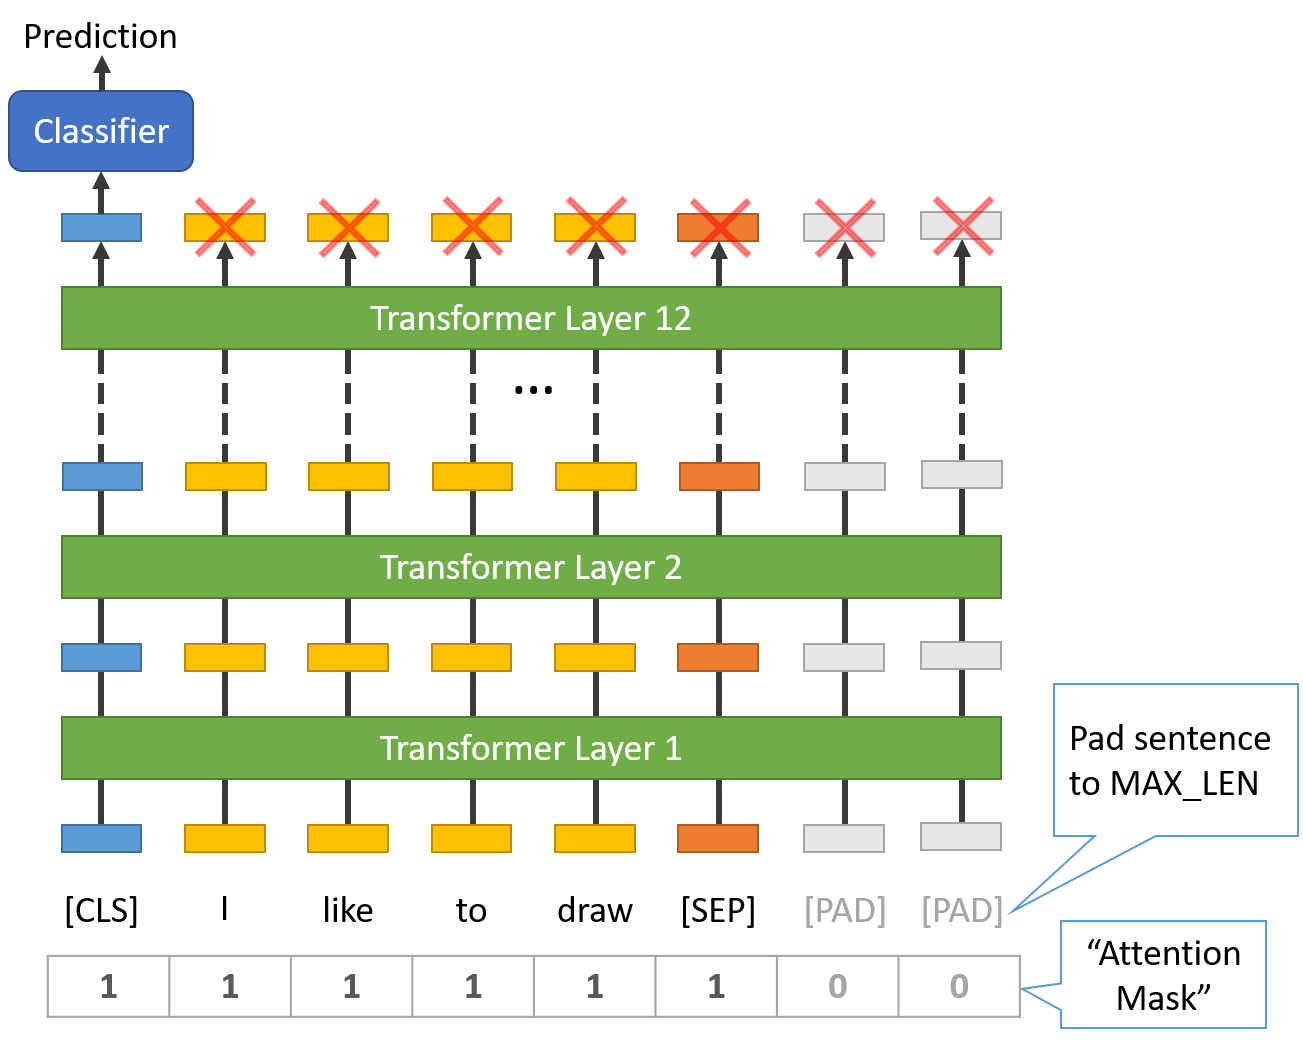

In [38]:
# 옵티마이저 설정하기
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에포크 횟수 정하기 
epochs = 2

# 총 훈련 스텝 정하기 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 초반에 학습률을 조금씩 변화시키는 스케줄러 생성하기 
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

### **모델 학습**

In [39]:
# 정확도 계산 함수 정의하기 
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [40]:
# 시간 표시 함수 정의하기
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # 시:분:초로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [41]:
# 재현을 위해 랜덤시드 고정하기
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화하기
model.zero_grad()

# 에포크만큼 반복하기 
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정하기
    t0 = time.time()

    # 로스 초기화하기
    total_loss = 0

    # 훈련모드로 변경하기 
    model.train()
        
    # 데이터로더에서 배치 수만큼 반복하여 가져오기 
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시하기
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣기
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출하기
        b_input_ids, b_input_mask, b_labels = batch

        # 순전파 수행하기                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        # 손실함수값 구하기
        loss = outputs[0]

        # 총 손실함수값 계산하기
        total_loss += loss.item()

        # 역전파 수행으로 그래디언트 계산하기
        loss.backward()

        # 그래디언트 클리핑(기울기 폭발에 대한 대책으로 기울기의 L2노름 값이 일정 기준을 초과하면 기울기를 수정하는 방식) 설정
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치의 매개값 갱신하기
        optimizer.step()

        # 스케줄러로 학습률 감소시키기
        scheduler.step()

        # 그래디언트 초기화하기
        model.zero_grad()

    # 평균 손실함수값 계산하기 
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정하기
    t0 = time.time()

    # 평가모드로 변경하기
    model.eval()

    # 변수 초기화하기
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣기
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출하기
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산하지 않기 
        with torch.no_grad():     
            # 순전파 수행하기
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 손실함수값 구하기
        logits = outputs[0]

        # CPU로 데이터 이동시키기 
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력된 로짓값과 라벨을 비교하여 정확도 계산하기 
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    # 정확도 출력하기
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

# 마감 메시지 출력하기
print("")
print("Training complete!")


======== Epoch 1 / 2 ========
Training...
  Batch   500  of  4,219.    Elapsed: 0:11:04.
  Batch 1,000  of  4,219.    Elapsed: 0:22:09.
  Batch 1,500  of  4,219.    Elapsed: 0:33:13.


KeyboardInterrupt: ignored

### **새로운 문장 평가**

In [ ]:
# 입력 데이터 변환하기
def convert_input_data(sentences):

    # BERT의 토크나이저로 문장을 토큰 단위로 분리하기
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이 설정하기
    MAX_LEN = 128

    # 토큰을 숫자 인덱스로 변환하기 
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    
    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화하기 
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않으므로 속도 향상시키기 
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환하기 
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    # 입력값과 마스크 출력하기 
    return inputs, masks

In [ ]:
# 문장 테스트하기
def test_sentences(sentences):

    # 평가모드로 변경하기
    model.eval()

    # 문장을 입력 데이터로 변환하기
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣기
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)
            
    # 그래디언트 계산 중지하기
    with torch.no_grad():     
        # 순전파 수행하기
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # 손실함수값 구하기
    logits = outputs[0]

    # CPU로 데이터 이동하기
    logits = logits.detach().cpu().numpy()

    # 로짓값 구하기 
    return logits

In [ ]:
# 실제 사례에 대한 결과값 출력하기1
logits = test_sentences(['연기는 별로지만 재미 하나는 끝내줌!'])

print(logits)
print(np.argmax(logits))

In [ ]:
# 실제 사례에 대한 결과값 출력하기2
logits = test_sentences(['주연배우가 아깝다. 총체적 난국...'])

print(logits)
print(np.argmax(logits))

##**2. Q&A 예시**

In [42]:
# 모듈 설치하기 
!pip install torch==1.5.0+cu92 torchvision==0.6.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 603.7 MB 6.2 kB/s 
     |████████████████████████████████| 6.5 MB 32.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.5.0+cu92 which is incompatible.


In [43]:
# 모듈 불러오기
import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

# 프리트레인된 토크나이저와 모델 불러오기
tokenizer = AutoTokenizer.from_pretrained("deepset/bert-base-cased-squad2") 
model = AutoModelForQuestionAnswering.from_pretrained("deepset/bert-base-cased-squad2", return_dict=False)

Downloading:   0%|          | 0.00/152 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/413M [00:00<?, ?B/s]

In [44]:
# 질문 제시하기 ("누가 마케도니아를 다스렸는가")
question = "Who ruled Macedonia"

# 문맥 제시하기 (마케도니아에 대한 설명으로서 역사와 통치 군주, 위치 등에 대해서 다루고 있음)
context = """Macedonia was an ancient kingdom on the periphery of Archaic and Classical Greece, 
and later the dominant state of Hellenistic Greece. The kingdom was founded and initially ruled 
by the Argead dynasty, followed by the Antipatrid and Antigonid dynasties. Home to the ancient 
Macedonians, it originated on the northeastern part of the Greek peninsula. Before the 4th 
century BC, it was a small kingdom outside of the area dominated by the city-states of Athens, 
Sparta and Thebes, and briefly subordinate to Achaemenid Persia."""


# 1. 입력값 토크나이징하기 
# 주의: return_tensors='pt'형태를 포함하지 않는다면 리스트 탐색은 쉬워지지만 모델에 피드를 줄 수 없게 됨
inputs = tokenizer.encode_plus(question, context, return_tensors="pt") 

# 2. 모델 점수 확보하기 
answer_start_scores, answer_end_scores = model(**inputs)
answer_start = torch.argmax(answer_start_scores)  # 최대 점수값과 함께 가장 답변의 시작부분일 것 같은 부분을 얻어내기
answer_end = torch.argmax(answer_end_scores) + 1  # 최대 점수값과 함께 가장 답변의 끝 부분일 것 같은 부분을 얻어내기

# 3. 답변의 범위 구하기 
# 확률상 시작과 끝에 해당할 가능성이 가장 높은 토큰을 얻게 되면, 그 사이에 있는 모든 토큰을 포함하는 방식으로 이 때 토큰들을 다시 문자로 변환함
tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][answer_start:answer_end]))

'the Argead dynasty'

In [45]:
# 위키피디아 모듈 설치하기
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=22c17f16c69ad7bcdab9a367466b2ca0a15e3c4adc165fa380102eb952242c01
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [46]:
# 모듈 불러오기
import wikipedia as wiki
import torch
from collections import OrderedDict
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

# 클래스 정의하기 
class DocumentReader:
    def __init__(self, pretrained_model_name_or_path='bert-large-uncased'):
        self.READER_PATH = pretrained_model_name_or_path
        self.tokenizer = AutoTokenizer.from_pretrained(self.READER_PATH) # 토크나이저 설정 
        self.model = AutoModelForQuestionAnswering.from_pretrained(self.READER_PATH, return_dict=False) # 모델 설정 
        self.max_len = self.model.config.max_position_embeddings # 최장 길이 설정 
        self.chunked = False

    # 토크나이저 정의 
    def tokenize(self, question, text):
        self.inputs = self.tokenizer.encode_plus(question, text, add_special_tokens=True, return_tensors="pt")
        self.input_ids = self.inputs["input_ids"].tolist()[0]

        # 입력값이 길이가 입력 최대한도를 넘으면 이를 청킹화시키고 표시하기 
        if len(self.input_ids) > self.max_len:
            self.inputs = self.chunkify()
            self.chunked = True

    # 청킹화하는 함수 정의 
    def chunkify(self):
        """ 
        트랜스포머 모델의 입력값의 최대한도 안에 들어갈 수 있도록 긴 글을 쪼개는 함수이며, BERT와 RoBERTa, ALBERT는 아래와 같은 형태로 입력할 필요가 있음
        [CLS] question tokens [SEP] context tokens [SEP].
        """

        # 토큰의 타입 인덱스값에 따른 질문 마스크 생성하기(0은 질문 토큰,1은 문맥 토큰)
        
        qmask = self.inputs['token_type_ids'].lt(1)
        qt = torch.masked_select(self.inputs['input_ids'], qmask)
        chunk_size = self.max_len - qt.size()[0] - 1 # "-1"은 마지막에 종결하는 [SEP]를 더하는 것을 나타내기 위함

        # 사전 형태의 사전을 만드는데 모든 하위 사전은 청킹화되기 이전의 모델 입력값의 구조를 모방함
        chunked_input = OrderedDict()
        for k,v in self.inputs.items():
            q = torch.masked_select(v, qmask)
            c = torch.masked_select(v, ~qmask)
            chunks = torch.split(c, chunk_size)
            
            for i, chunk in enumerate(chunks):
                if i not in chunked_input:
                    chunked_input[i] = {}

                thing = torch.cat((q, chunk))
                if i != len(chunks)-1:
                    if k == 'input_ids':
                        thing = torch.cat((thing, torch.tensor([102])))
                    else:
                        thing = torch.cat((thing, torch.tensor([1])))

                chunked_input[i][k] = torch.unsqueeze(thing, dim=0)
        return chunked_input


    # 정답 함수 구현하기 
    def get_answer(self):
        if self.chunked:
            answer = ''
            for k, chunk in self.inputs.items():
                answer_start_scores, answer_end_scores = self.model(**chunk)

                answer_start = torch.argmax(answer_start_scores)
                answer_end = torch.argmax(answer_end_scores) + 1

                ans = self.convert_ids_to_string(chunk['input_ids'][0][answer_start:answer_end])
                if ans != '[CLS]':
                    answer += ans + " / "
            return answer
        else:
            answer_start_scores, answer_end_scores = self.model(**self.inputs)

            answer_start = torch.argmax(answer_start_scores)  # get the most likely beginning of answer with the argmax of the score
            answer_end = torch.argmax(answer_end_scores) + 1  # get the most likely end of answer with the argmax of the score
        
            return self.convert_ids_to_string(self.inputs['input_ids'][0][
                                              answer_start:answer_end])
    # 인덱스를 문자로 변환하는 함수 정의하기 
    def convert_ids_to_string(self, input_ids):
        return self.tokenizer.convert_tokens_to_string(self.tokenizer.convert_ids_to_tokens(input_ids))

In [47]:
# # collapse-hide 

# 결과값을 보다 읽기 쉽게 하기 위해서 토큰 문자열의 길이에 대한 주의사항을 끄기 
import logging
logging.getLogger("transformers.tokenization_utils").setLevel(logging.ERROR)

In [48]:
# 질문 설정하기
questions = [
    'When was Bill Clinton born?',
    'Why is the sky blue?',
    'How many sides does a pentagon have?'
]

# 리더기 설정하기 
reader = DocumentReader("deepset/bert-base-cased-squad2") 


# 질문, 위키피디아 모듈에서의 페이지 결과값, 그리고 그에 대한 답을 출력하기 
for question in questions:
    print(f"Question: {question}")
    results = wiki.search(question)

    page = wiki.page(results[0])
    print(f"Top wiki result: {page}")

    text = page.content

    reader.tokenize(question, text)
    print(f"Answer: {reader.get_answer()}")
    print()

Question: When was Bill Clinton born?
Top wiki result: <WikipediaPage 'Bill Clinton'>


Token indices sequence length is longer than the specified maximum sequence length for this model (17543 > 512). Running this sequence through the model will result in indexing errors


Answer: 1946 / 

Question: Why is the sky blue?
Top wiki result: <WikipediaPage 'Diffuse sky radiation'>
Answer: Rayleigh scattering /  / 

Question: How many sides does a pentagon have?
Top wiki result: <WikipediaPage 'The Pentagon'>
Answer: five / 



## **3-1. 예시**

In [49]:
# 파이프라인 설정하기
import transformers
from transformers import pipeline
unmasker = pipeline("fill-mask")

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)


In [50]:
# 매스킹된 예시문장 제시하기 
from pprint import pprint
pprint(unmasker(f"HuggingFace is creating a {unmasker.tokenizer.mask_token} that the community uses to solve NLP tasks."))

[{'score': 0.17927499115467072,
  'sequence': 'HuggingFace is creating a tool that the community uses to solve '
              'NLP tasks.',
  'token': 3944,
  'token_str': ' tool'},
 {'score': 0.11349404603242874,
  'sequence': 'HuggingFace is creating a framework that the community uses to '
              'solve NLP tasks.',
  'token': 7208,
  'token_str': ' framework'},
 {'score': 0.05243541672825813,
  'sequence': 'HuggingFace is creating a library that the community uses to '
              'solve NLP tasks.',
  'token': 5560,
  'token_str': ' library'},
 {'score': 0.034935448318719864,
  'sequence': 'HuggingFace is creating a database that the community uses to '
              'solve NLP tasks.',
  'token': 8503,
  'token_str': ' database'},
 {'score': 0.028602484613656998,
  'sequence': 'HuggingFace is creating a prototype that the community uses to '
              'solve NLP tasks.',
  'token': 17715,
  'token_str': ' prototype'}]


In [51]:
from transformers import AutoModelForMaskedLM, AutoTokenizer 
import torch

# 토크나이저와 모델 불러오기
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
model = AutoModelForMaskedLM.from_pretrained("distilbert-base-cased")

# 시퀀스 제시하기
sequence = "Distilled models are smaller than the models they mimic. Using them instead of the large " \
    f"versions would help {tokenizer.mask_token} our carbon footprint."

# 토크나이징하고 토큰 인덱스에 매스킹하기 
inputs = tokenizer(sequence, return_tensors="pt")
mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]

# 토큰의 로짓값 구하고 매스킹하기 
token_logits = model(**inputs).logits
mask_token_logits = token_logits[0, mask_token_index, :]

# 최고 다섯개의 로짓값 구하기 
top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

for token in top_5_tokens:
    print(sequence.replace(tokenizer.mask_token, tokenizer.decode([token])))

Distilled models are smaller than the models they mimic. Using them instead of the large versions would help reduce our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help increase our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help decrease our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help offset our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help improve our carbon footprint.


## **3-2. 예시**

In [54]:
from transformers import AutoModelForCausalLM, AutoTokenizer, top_k_top_p_filtering
import torch
from torch.nn import functional as F

# GPT-2 토크나이저와 모델 불러오기 
tokenizer = AutoTokenizer.from_pretrained('gpt2')
model = AutoModelForCausalLM.from_pretrained('gpt2')

# 입력값 구문 토크나이징하기 
phrase = f'Make sure to read the rest of this'
inputs = tokenizer.encode(phrase, return_tensors='pt')

# 마지막 층에서 로짓값 얻기 
last_layer_logits = model(inputs).logits[:, -1, :]

# 30개의 최대 로짓값을 최고로 유지하되 총 확률값이 1과 같거나 넘을 경우 중단하기
top_logits = top_k_top_p_filtering(last_layer_logits, top_k=100, top_p=1.0)

# 로짓값을 소프트맥스 함수로 확률값으로 변환시키기 
probabilities = F.softmax(top_logits, dim=-1)

# 다음번 토큰 생성하기 
generated_next_token = torch.multinomial(probabilities, num_samples=2)
generated = torch.cat([inputs, generated_next_token], dim=-1)

# 결과값 얻기 
result_string = tokenizer.decode(generated.tolist()[0])

# 문자열 출력하기
print(result_string)

Make sure to read the rest of this review post
